In [1]:
import pandas as pd
import numpy as np
from pycaret.classification import *

In [2]:
path = '../data/ETHUSDT_5m.csv'
df = pd.read_csv(path)

In [3]:
#make label
#rule : if next 10 bar is higher than current bar about 0.25%, label is 1, else 0
df['label'] = np.where(df['close'].shift(-10) > df['close'] * 1.0025, 1, 0)
df = df.dropna()

In [4]:
df.value_counts('label')

label
0    2367
1     633
dtype: int64

In [5]:
df = df.drop(['time'], axis=1)

In [6]:
s = setup(df, target='label', session_id=123, log_experiment=True, experiment_name='ethusdt_5m',preprocess=True,normalize=True,remove_outliers=True,outliers_method='iforest')

,Description,Value
0,Session id,123
1,Target,label
2,Target type,Binary
3,Original data shape,"(3000, 6)"
4,Transformed data shape,"(2895, 6)"
5,Transformed train set shape,"(1995, 6)"
6,Transformed test set shape,"(900, 6)"
7,Numeric features,5
8,Preprocess,True
9,Imputation type,simple


2023/10/28 12:41:14 INFO mlflow.tracking.fluent: Experiment with name 'ethusdt_5m' does not exist. Creating a new experiment.


In [7]:
best2 = compare_models(sort='AUC', n_select=2)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,12:41:14
Status,. . . . . . . . . . . . . . . . . .,Fitting 10 Folds
Estimator,. . . . . . . . . . . . . . . . . .,Logistic Regression


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
catboost,CatBoost Classifier,0.7938,0.6952,0.1310,0.5584,0.2071,0.1395,0.1894,1.7690
rf,Random Forest Classifier,0.7838,0.6936,0.2844,0.4724,0.3513,0.2335,0.2451,0.1120
et,Extra Trees Classifier,0.7714,0.6918,0.2686,0.4273,0.3268,0.1998,0.2082,0.0860
gbc,Gradient Boosting Classifier,0.7900,0.6895,0.1763,0.5105,0.2561,0.1688,0.2024,0.0890
ada,Ada Boost Classifier,0.7833,0.6832,0.0767,0.4575,0.1295,0.0701,0.1098,0.0680
lightgbm,Light Gradient Boosting Machine,0.7929,0.6780,0.2664,0.5145,0.3480,0.2411,0.2603,11.2820
xgboost,Extreme Gradient Boosting,0.7829,0.6707,0.2867,0.4729,0.3556,0.2353,0.2462,0.0640
knn,K Neighbors Classifier,0.7790,0.6354,0.1919,0.4383,0.2653,0.1599,0.1787,0.2420
lr,Logistic Regression,0.7819,0.6336,0.0428,0.3306,0.0750,0.0326,0.0537,0.4100
nb,Naive Bayes,0.7267,0.6273,0.3046,0.3443,0.3195,0.1506,0.1526,0.0480


In [8]:
voting = blend_models(estimator_list=best2, fold=5, method='soft')

In [9]:
#save model
save_model(voting, model_name='ethusdt_5m')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['open', 'high', 'low', 'close',
                                              'volume'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,
                                                               missing_values=nan,
                                                               strategy='mean',
                                                               verbose='deprecated'))),
                 ('categorical_imputer',
                  TransformerWrapper(exclud...
                                                                    

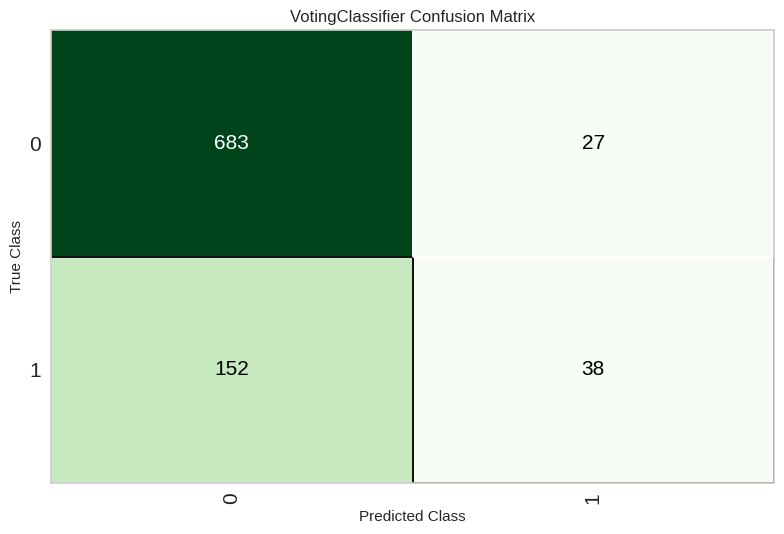

In [10]:
plot_model(voting, plot='confusion_matrix')